# 第4回 データ可視化

[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slt666666/biostatistics_text_wed/blob/main/source/_static/colab_notebook/chapter4.ipynb)

## はじめに

前回の記述統計学では、データを手にした際に、どの様にデータの特徴を捉えるかを扱いました。

その際に、ヒストグラムや散布図、分割表等、視覚的にデータを捉える重要性を確認しました。

今回は統計学自体からは少し離れたトピックになりますが、データを可視化する方法について扱います。

前回の章でも、Rに元からある関数`plot`や`hist`、`boxplot`を用いることで、簡単なグラフは作成出来ました。

しかし、第2章のRについての講義でも触れた様に、他者の作成したパッケージ(関数をまとめたもの)を利用することで、より綺麗なグラフを簡単に作成出来る関数を使用することが出来るようになります。

その代表例が`ggplot2`というパッケージになります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter4/ggplot2_logo.png?raw=true" alt="ggplot2_logo" height="150px">

[ggplot2の公式ページ](https://ggplot2.tidyverse.org/)

ggplot2はHadley Wickhamによって開発されたデータ可視化のためのパッケージで、Rを使用する殆どのユーザーがグラフ描写に使用しているパッケージになります。

(Hadley WickhamはRstudioのチーフサイエンティスト・統計学者で、`tydyverse`等のパッケージを開発し、Rの普及に多大なる貢献をしています。)

研究室に配属された後、グラフ等を作成する機会は非常に増えるかと思いますが、その時にggplot2等を用いてグラフを作成出来る様になっておくと非常に役立ちます。

また、以降の講義でも一部のグラフの作成には`ggplot2`を使用する予定です。

そこで、本章では`ggplot2`の基本的な使い方を扱います。


## ggplot2のインストール

ggplot2を使うにはggplot2をRへインストールする必要があります。

ただ、Google Colaboratoryでは、代表的なパッケージは既にインストールされているので今回はインストールする必要はありません。

もし自分のPCでRを動かして`ggplot2`を使用する場合には`install.packages`関数でインストールする必要があります。

`install.packages("インストールしたいパッケージ名")`

In [ ]:
# パッケージのインストール
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## ggplot2パッケージの読み込み

Rの基本の所でも扱いましたが、パッケージはインストールしただけでは使用できるようにはなりません。

`library`関数で必要なパッケージを明示的に読み込ませる必要があります。

`library(パッケージ名)`

パッケージの読み込みはRを起動する度に行う必要があります。

In [ ]:
# パッケージの読み込み
library(ggplot2)

## ggplot2による作図の基本

ggplot2を使用することで、散布図や棒グラフ、箱ひげ図等様々な図を作成できますが、

その使用方法は概ね下記の様な流れになります。

1. `ggplot`関数にデータを渡し、どのデータを可視化するか指定する。例) x軸にどの値を使用するか、等。
2. `geom_xxx`関数(`geom_point`や`geom_histogram`等)で、自分が作りたい図(散布図なのかヒストグラムなのか…etc)の層 (layer) を加える。
3. 軸ラベル (labs)や凡例 (legend)等、細かい設定を追加する。
4. 図を表示・保存する。

ここからそれぞれについて見ていきます。

まずは前回使用したデータを用いて、草丈(Height)と葉身長(Leaf_length)の散布図を描くことを目標に進めていきます。

ggplot2では`plot`関数とは異なり、`データフレーム`の形式でデータを入力する形になります。

まずは`read.csv`関数でCSVファイルのデータをデータフレームとして読み込んでおきます。

`read.csv("ファイルのURL/パス")`

In [ ]:
# サンプルデータをdfに読み込み
df <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter3_data.csv")
head(df)

,X,Flower,Resistance,Age,Height,Leaf_length,Leaf_width
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,サンプル1,Yellow,Normal,1,65.78827,7.834566,1.2310844
2,サンプル2,Purple,Weak,1,26.70546,4.654080,0.6596468
3,サンプル3,Blue,Very strong,18,31.67394,6.657642,0.5777713
4,サンプル4,Blue,Very strong,2,41.59529,4.530526,1.0155126
5,サンプル5,Blue,Very strong,4,40.18388,6.621776,0.5938072
6,サンプル6,Blue,Very strong,4,28.85123,6.452588,0.3979530


### 1. データの指定

データを読み込んだら、まずは`ggplot`関数でどのデータを使い、どの列のデータをグラフにするか指定します。

`ggplot`関数は
* 1つ目の引数にデータフレームの名前
* 2つ目の引数では`aes` (aestheticsの略) という関数でデータフレーム内のどの列を何のために使うか

をそれぞれ指定します。例えばx軸とy軸にデータがある場合は…

```
ggplot(データフレーム名, aes(x=列名, y=列名)) # データの指定
```

今回は草丈(Height)をx軸、葉身長(Leaf_length)をy軸として散布図を作成します。

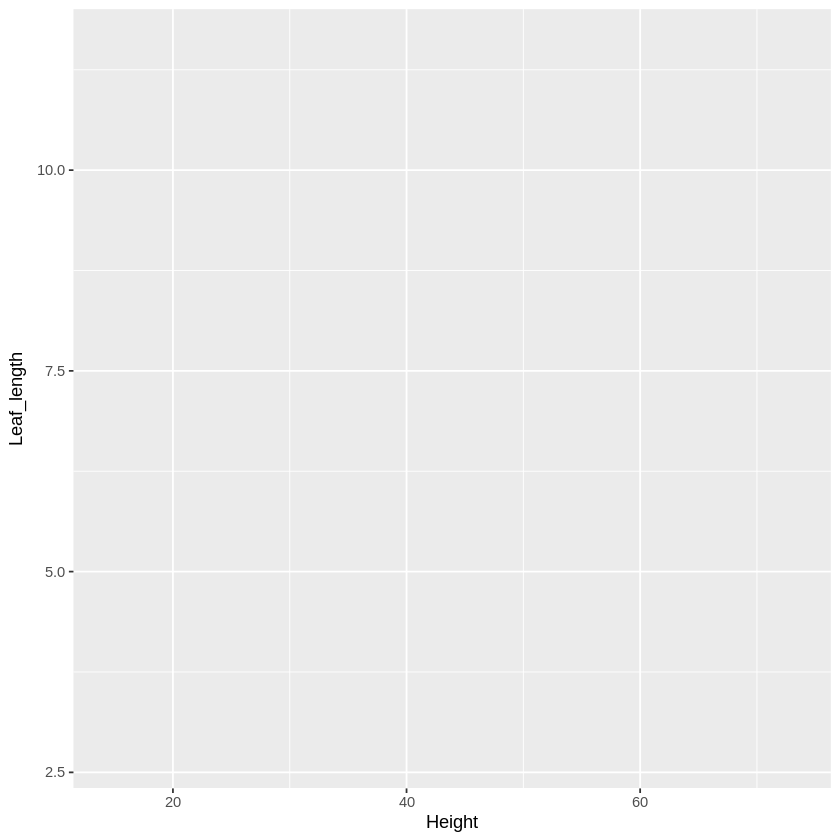

In [ ]:
# グラフ化するデータの指定
g <- ggplot(df, aes(x=Height, y=Leaf_length))
g

データを指定しただけだと何のグラフを描くのか指定していないので、キャンバスだけが描写されているかと思います。

そこで次に指定したデータを用いてどんなグラフを描くのかを関数で指定します。

### 2. グラフの種類の指定

使用するデータを指定したら、次は作図したいグラフに応じたgeometric objects(グラフのこと)を指定します。

geometric objectsには様々なものがありますが、例えば

* geom_point：散布図
* geom_line：折れ線グラフ
* geom_smooth：平滑化されたグラフ
* geom_bar：棒グラフ
* geom_histogram：ヒストグラム
* geom_polygon：ポリゴングラフ
* geom_map：地図グラフ
* geom_dotplot：ドットグラフ

等があります。

今回は散布図を描きたいので、`geom_point`を使用します。

`ggplot`では`+`でどんどん要素を追加していく形でコードを書いていきます。

先ほど`ggplot`関数でデータを指定したところに`+`で`geom_point()`を追加していきます。

```
g <- ggplot(データフレーム名, aes(x=列名, y=列名)) # データの指定
g <- g + geom_point()                              # グラフの指定
```

また、使用するグラフによって`aes()`の中で指定すべきものが変わります。

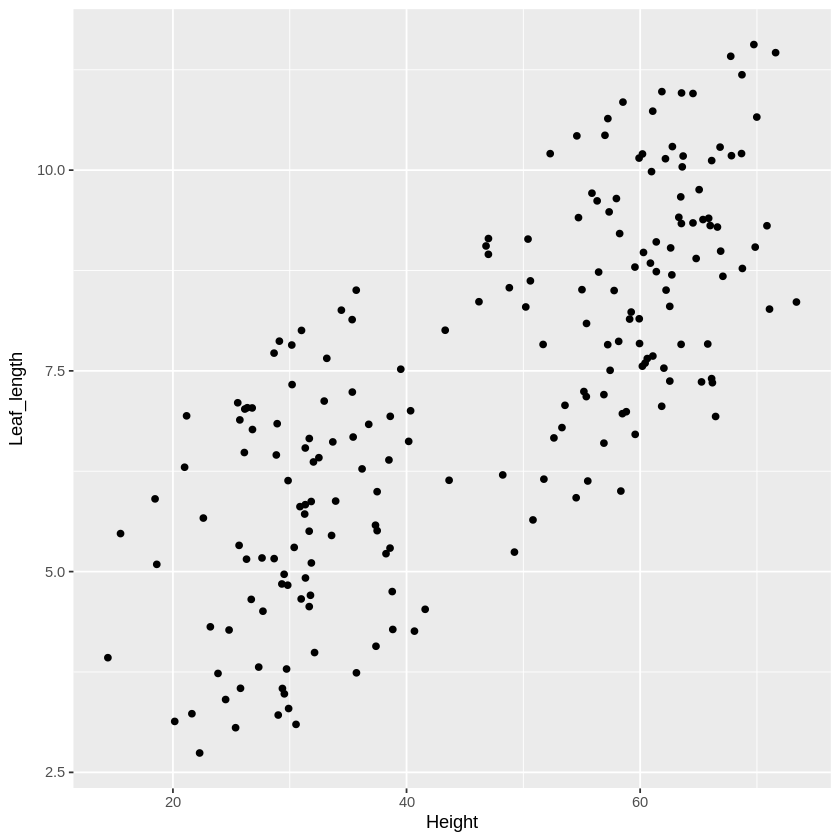

In [ ]:
# 散布図を要素に追加
g <- ggplot(df, aes(x=Height, y=Leaf_length))
g <- g + geom_point()
g

描くグラフを散布図(`geom_point`)と指定したので、今度はキャンバスの上にx,ｙに指定したデータが使用された散布図が描かれました。

Rの`plot`関数で描いたものよりも何となく良い感じに見えるのではないでしょうか。

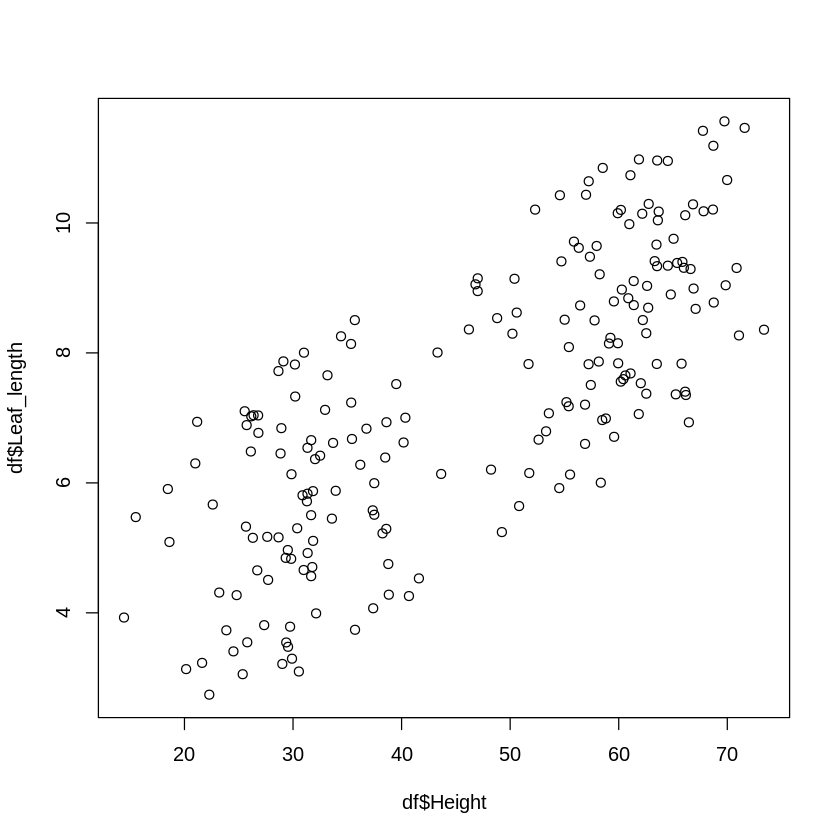

In [ ]:
#参考(パッケージ無しの場合)
plot(df$Height, df$Leaf_length)

※一応、ggplot2もRのコードで作成されているので、`plot`関数のオプションや他のRに元々ある図形描写関数等を駆使すればggplot2で描くことが出来るグラフと全く同じものを作成する事は可能です。滅茶苦茶がんばれば。

### 3. 軸ラベルなどの追加

基本的なグラフは先ほどのステップで描くことが出来ましたが、ラベルやタイトル等細かい部分の設定も同じように追加していくことが出来ます。

例えば今のままだと軸のラベルがHeightやLeaf_lengthとなっているので、その部分を変えてみます。ついでに図のタイトルも追加します。

`labs`でラベルやタイトルを編集することが出来ます。

```
g <- ggplot(データフレーム名, aes(x=列名, y=列名))                  # データの指定
g <- g + geom_point()                                               # グラフの指定
g <- g + labs(x="x軸ラベル名", y="y軸ラベル名", title="タイトル名") # ラベルなどの設定
```

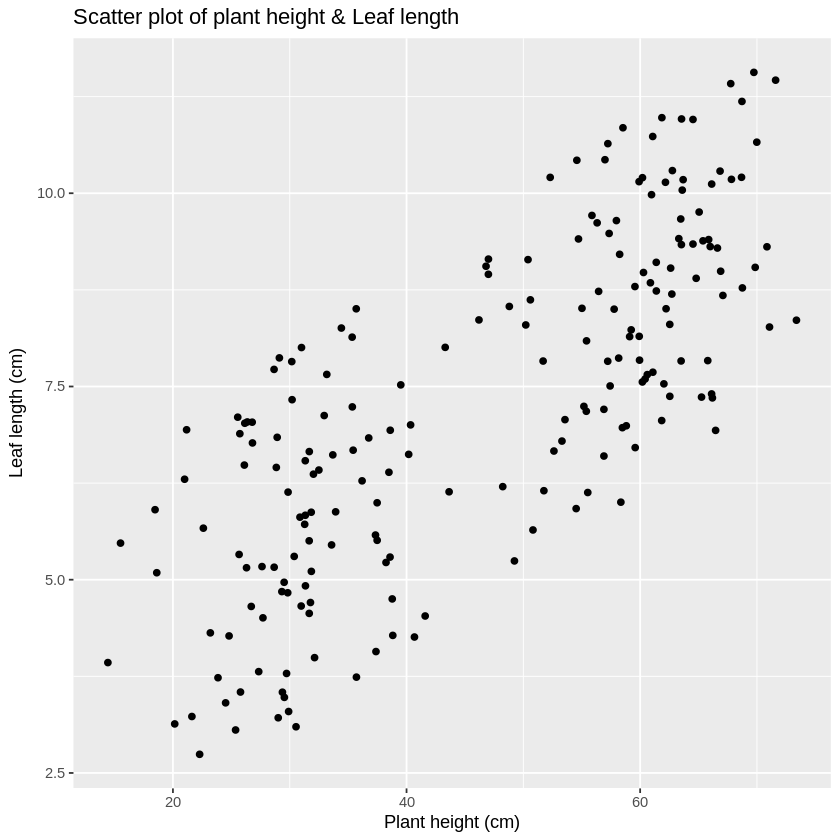

In [ ]:
# 軸のラベルとタイトルを付与
g <- ggplot(df, aes(x=Height, y=Leaf_length))
g <- g + geom_point()
g <- g + labs(x="Plant height (cm)", y="Leaf length (cm)", title="Scatter plot of plant height & Leaf length")
g

この様に、`g <- g + 新しい要素や設定`という形で、どんどんグラフにラベル等の設定や要素を追加していくことが出来ます。

当然、新しいグラフを追加し、1つのキャンバスに複数のグラフを描写することも可能です。

講義ではまだ扱っていませんが、散布図では回帰直線を描くことが多いです。

回帰直線は`geom_smooth`というgeometric objectsになるので追加してみましょう。

```
g <- ggplot(データフレーム名, aes(x=列名, y=列名))                  # データの指定
g <- g + geom_point()                                               # グラフの指定
g <- g + geom_smooth(method = "lm")                                 # 回帰直線の追加
g <- g + labs(x="x軸ラベル名", y="y軸ラベル名", title="タイトル名") # ラベル等の設定
```

※`method = "lm"`という部分で線形モデルを指定しています

`geom_smooth()` using formula = 'y ~ x'


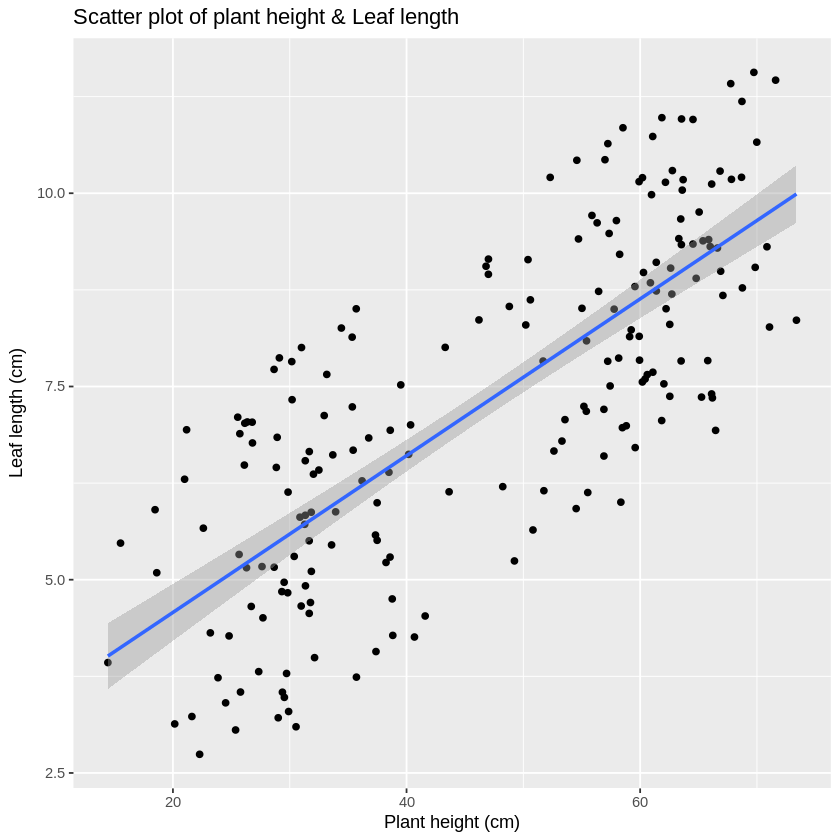

In [ ]:
# 散布図にgeom_smoothで回帰直線を追加
g <- ggplot(df, aes(x=Height, y=Leaf_length))
g <- g + geom_point()
g <- g + geom_smooth(method = "lm")
g <- g + labs(x="Plant height (cm)", y="Leaf length (cm)", title="Scatter plot of plant height & Leaf length")
g

この様な形で、`g + geom_XXX()`と足していくことで、複数の要素を描くことが可能です。

また、フォントサイズなども調整可能で`theme`関数を用いて調整できます。

`geom_smooth()` using formula = 'y ~ x'


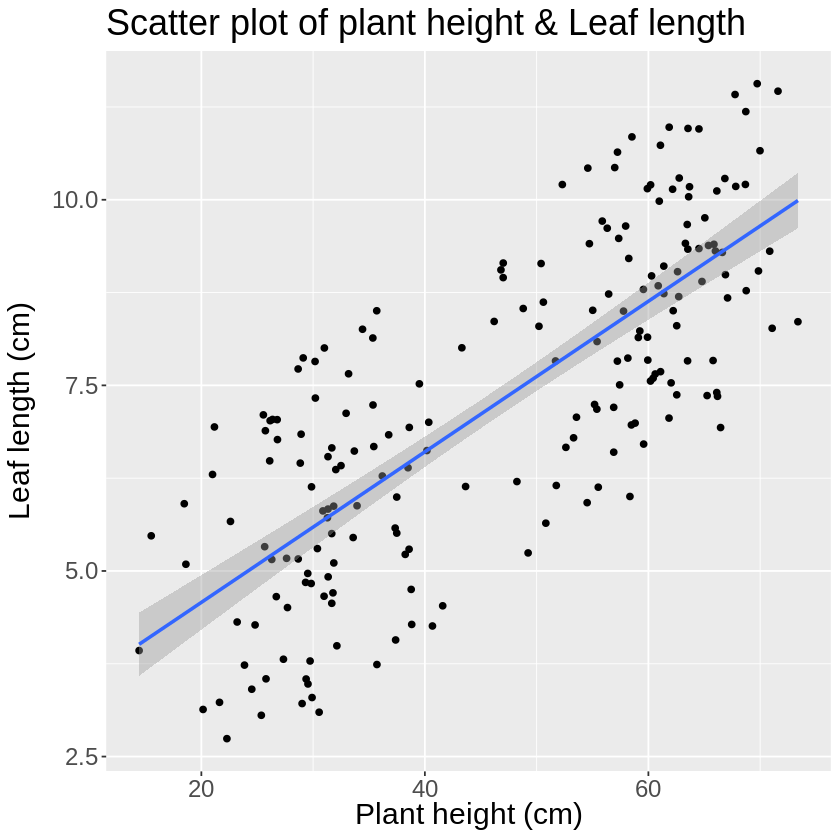

In [ ]:
# フォントサイズを調整
g <- ggplot(df, aes(x=Height, y=Leaf_length))
g <- g + geom_point()
g <- g + geom_smooth(method = "lm")
g <- g + labs(x="Plant height (cm)", y="Leaf length (cm)", title="Scatter plot of plant height & Leaf length")
g <- g + theme(text = element_text(size = 18))
g

### 4. 図を表示・保存する

Google ColaboratoryやR、Rstudioでも最後に`g`とすることで図を表示させることが出来ました。

これは`plot(g)`や`print(g)`を省略している形になります。

```
g <- ggplot(df, aes(x=列名, y=列名)) # データの指定
g <- g + geom_point()                # グラフの指定
g                                    # plot(g)やprint(g)でも可
```
複数の図を作図するプログラムや、プログラムの途中で図を表示させたい場合には、`print(g)`等と明示しておくと分かりやすいでしょう。


また、作成した図を保存したい時には`ggsave`関数を使用します。

`ggsave`関数を使用することで図の幅・高さや画質等を指定して図を保存することが出来ます。

特に論文等に載せる図は、解像度`300dpi`以上が要求されることが多いです。

`ggsave(filename = "保存した時のファイル名", plot = 図の変数, device = "png", dpi = 300)`

他にも`width=5`, `height=5`の様な形で幅・高さを指定できます。

```
g <- ggplot(df, aes(x=列名, y=列名))                                             # データの指定
g <- g + geom_point()                                                            # グラフの指定
ggsave(filename = "保存した時のファイル名", plot = g, device = "png", dpi = 300) # 図の保存
```

In [ ]:
# 作成した図の保存
g <- ggplot(df, aes(x=Height, y=Leaf_length))
g <- g + geom_point()
g <- g + geom_smooth(method = "lm")
g <- g + labs(x="Plant height (cm)", y="Leaf length (cm)", title="Scatter plot of plant height & Leaf length")
g <- g + theme(text = element_text(size = 18))
ggsave(filename = "figure.png", plot = g, device = "png", dpi = 300)

Saving 6.67 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


以上の様に、必要な要素をどんどん加えていく形で、

基本的には 1. データを指定、2. グラフの指定(、3. ラベル等の調整、4. 図の保存)という流れで`ggplot2`ではグラフを作成します。

## 色を用いたデータの可視化

### 散布図の色分け

先ほど描いた散布図は黒い点で全ての観測値を表示していましたが、データの種類に応じて色分けすることも可能です。

今回は花の色毎に点を色分けしてみます。

データの色分けは、geometric objects(散布図だと`geom_point`)の引数で`aes(colour=XXX)`と指定します。

```
g <- ggplot(データフレーム名, aes(x=列名, y=列名))      # データの指定
g <- g + geom_point(aes(colour=色分けの基準とする列名)) # グラフの指定 & 色分けの指定
```

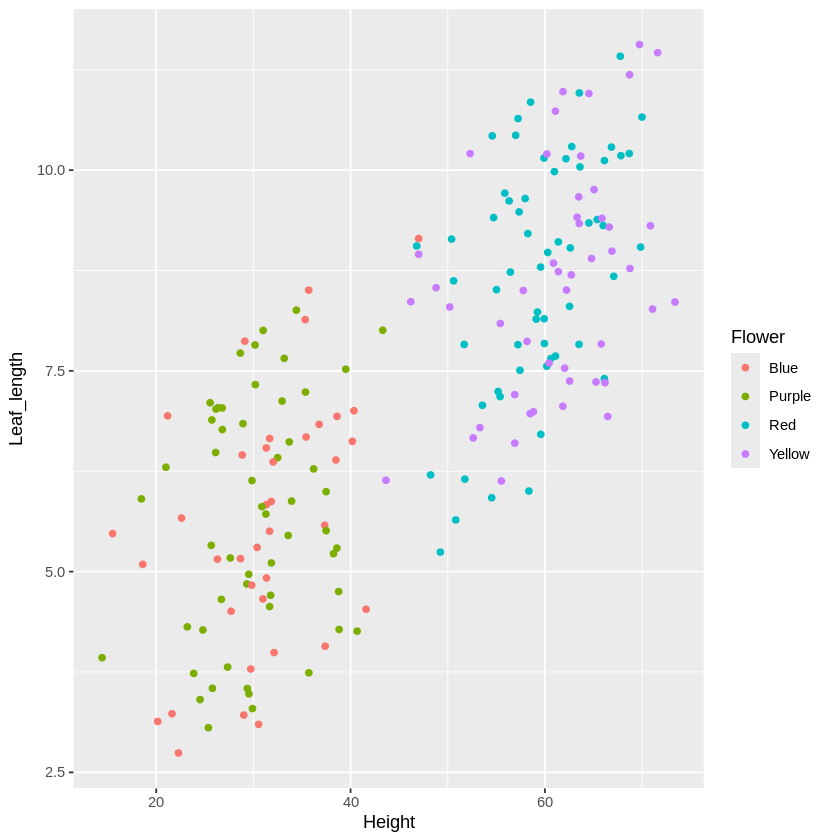

In [ ]:
# データの色分け
g <- ggplot(df, aes(x=Height, y=Leaf_length))
g <- g + geom_point(aes(colour=Flower))
g

こうすることで花の色毎に点が色付けされ、データの特徴がより分かりやすくなります。

(※花の色と点の色が一致していないですが、`scale_colour_identity`等の関数を使用して色を決めることも出来ます。)

**回帰直線を描く**`geom_smooth`では、色分けを行うと各色毎に回帰直線を描いてくれます。

```
g <- ggplot(データフレーム名, aes(x=列名, y=列名))                       # データの指定
g <- g + geom_point(aes=(colour=色分けの基準とする列名))                 # グラフの指定 & 色分けの指定
g <- g + geom_smooth(method = "lm", aes=(colour=色分けの基準とする列名)) # 回帰直線の追加 & 色分けの指定
g <- g + labs(x="x軸ラベル名", y="y軸ラベル名", title="タイトル名")      # ラベルやタイトルの設定
```



`geom_smooth()` using formula = 'y ~ x'


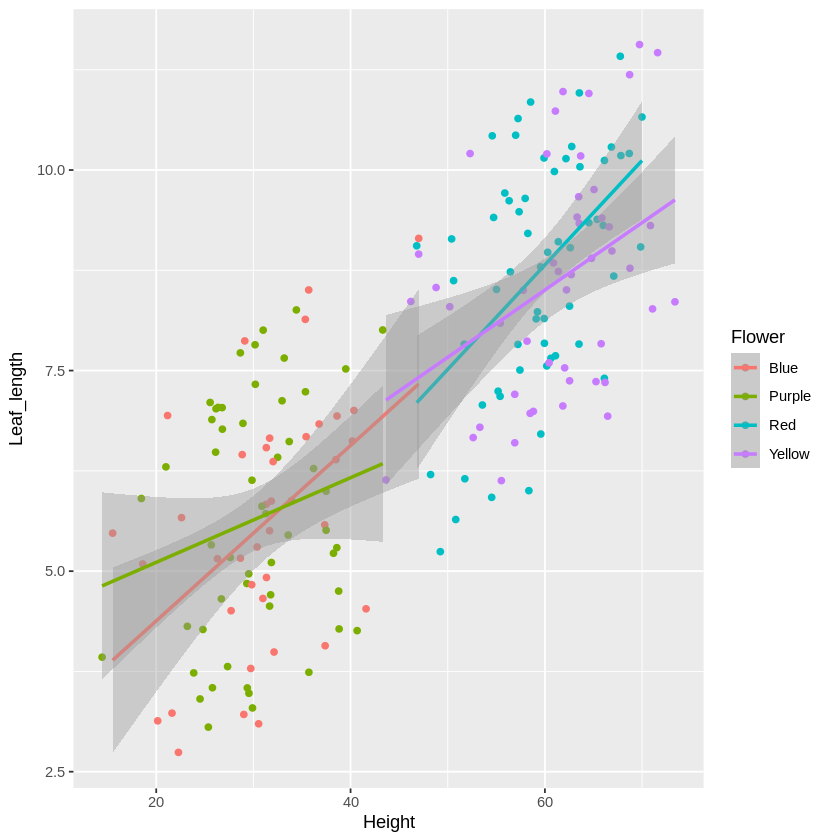

In [ ]:
# 回帰直線ごとに色分け
g <- ggplot(df, aes(x=Height, y=Leaf_length))
g <- g + geom_point(aes(colour=Flower))
g <- g + geom_smooth(method = "lm", aes(colour=Flower))
g

各花の色のデータ毎に回帰直線を描くことが出来ました。

このように、各`geometric_objects`において、`aes`の中で`colour`や`hue`等を指定すると、データを色分けしたり分けてグラフを描いたりすることが出来ます。

## その他のグラフ

### ヒストグラム

1次元データの記述統計の所で扱ったヒストグラムも`ggplot2`で描くことが出来ます。

草丈(Height)でヒストグラムを描いてみましょう。

今回は草丈のデータしか用いないので、最初の`ggplot`関数でどのデータをx軸,y軸で使用するかを指定するところでは、x軸のデータのみ指定すればOKです。

`g <- ggplot(データフレーム名, aes(x=列名))`

そして、散布図(`geom_point`)からヒストグラム(`geom_histogram`)へgeometric objectsを変更します。

```
g <- ggplot(データフレーム名, aes(x=可視化したい列名)) # データの指定
g <- g + geom_histogram()                              # グラフの指定
```


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


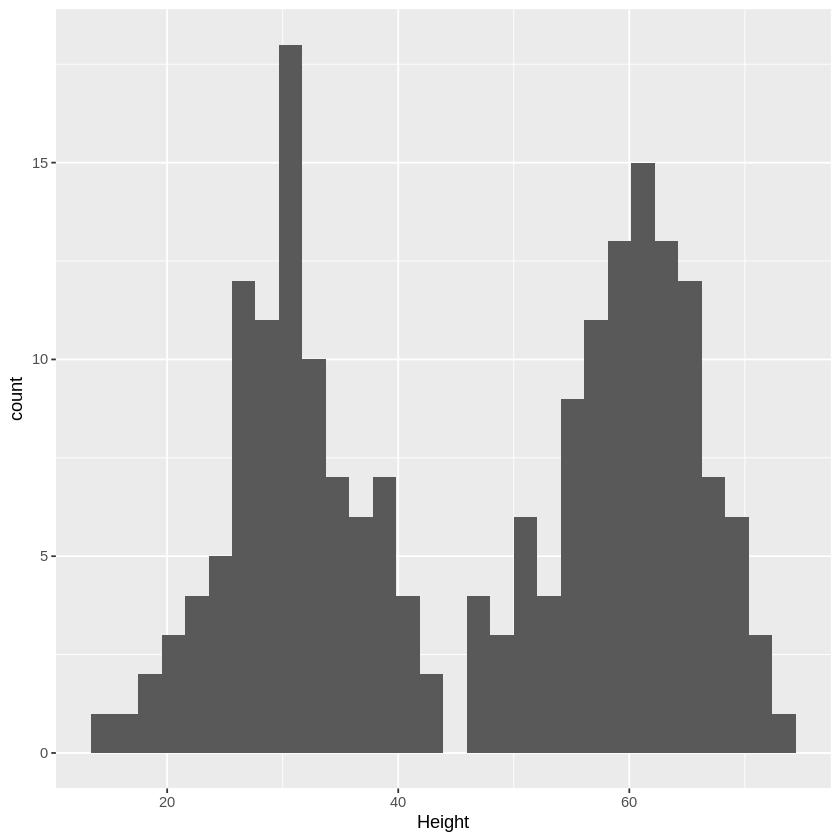

In [ ]:
# ヒストグラムの描写
g <- ggplot(df, aes(x=Height))
g <- g + geom_histogram()
g

ヒストグラムでは、`geom_histogram`の引数で`colour=色`を指定することで、枠組みの色を付けたり、

`binwidth=幅`でヒストグラムの幅の長さを指定することも出来ます。

```
g <- ggplot(データフレーム名, aes(x=可視化したい列名))    # データの指定
g <- g + geom_histogram(colour="色名", binwidth=幅の長さ) # グラフの指定
```

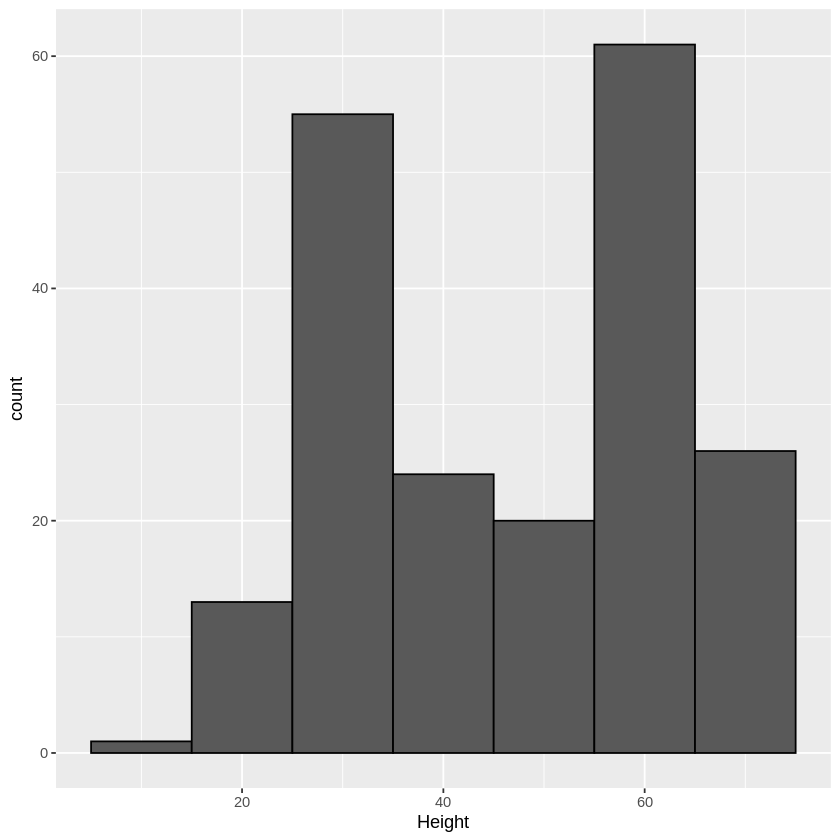

In [ ]:
# ヒストグラムの枠組みの色、幅の長さを調整
g <- ggplot(df, aes(x=Height))
g <- g + geom_histogram(colour="black", binwidth=10)
g

ヒストグラムについても、先ほどの散布図と同様に、データを特定の指標で分けて複数のヒストグラムに色分けして描くことが可能です。

`geom_histogram`の引数で`aes(fill=分ける指標の列名)`を指定することで、分割できます。

```
g <- ggplot(データフレーム名, aes(x=可視化したい列名)) # データの指定
g <- g + geom_histogram(aes(fill=分ける指標の列名))    # グラフの指定
```


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


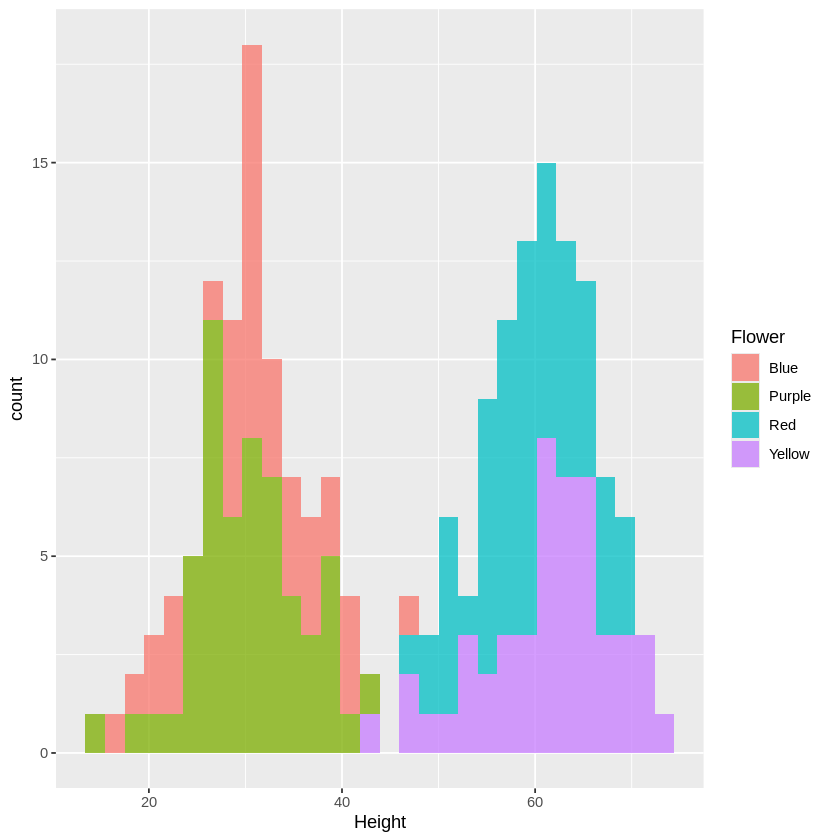

In [ ]:
# ヒストグラムをデータごとに色分け
g <- ggplot(df, aes(x=Height))
g <- g + geom_histogram(aes(fill=Flower), alpha=0.75)
g

追加で平均値のところに直線を引いたりも出来ます。

縦に直線を引くには`geom_vline`を使用します。

`geom_vline(xintercept=直線を引くx座標, color="色名", linetype="線の種類")`

```
g <- ggplot(データフレーム名, aes(x=可視化したい列名))                 # データの指定
g <- g + geom_histogram(aes(fill=分ける指標の列名))                    # グラフの指定
g <- g + geom_vline(xintercept=x座標, color="色名", linetype="dashed") # 垂直な線の追加
```


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


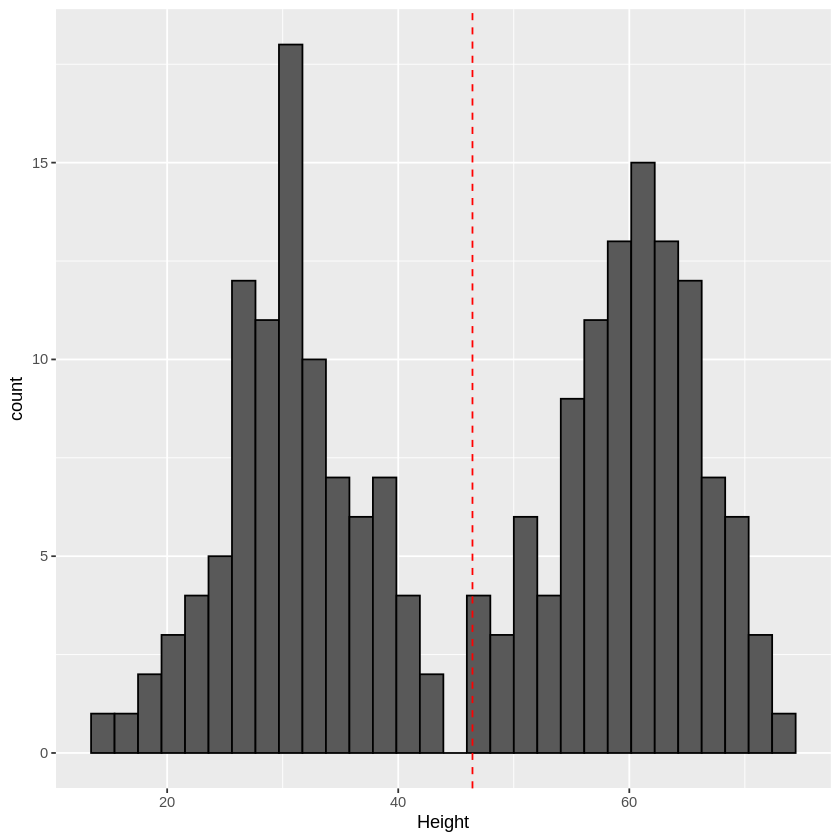

In [ ]:
# 平均値の場所に直線を引く
g <- ggplot(df, aes(x=Height))
g <- g + geom_histogram(colour="black")
g <- g + geom_vline(xintercept=mean(df$Height), color="red", linetype="dashed")
g

### 棒グラフ

ヒストグラムに似たグラフとして棒グラフもあります。

棒グラフのgeometric objectsは`geom_bar`になります。

今回は年齢(Age)の列のデータを棒グラフにしてみましょう。

```
g <- ggplot(データフレーム名, aes(x=可視化したい列名)) # データの指定
g <- g + geom_bar()                                    # グラフの指定
```


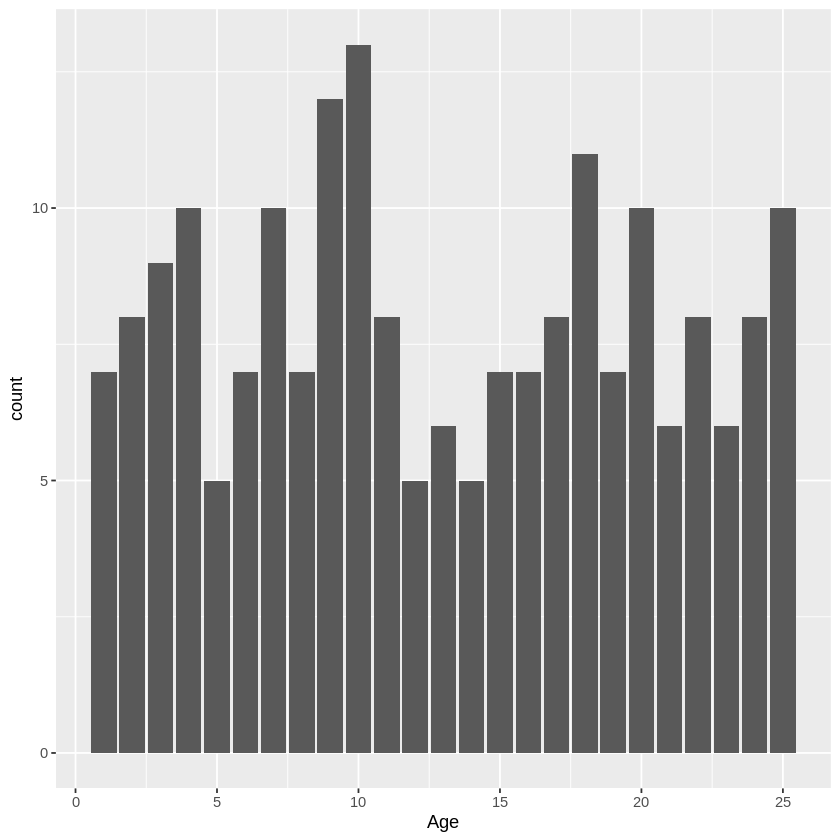

In [ ]:
# 棒グラフを描写
g <- ggplot(df, aes(x=Age))
g <- g + geom_bar()
g

### ボックスプロット(箱ひげ図)

データの代表値やばらつき具合を可視化するために良く用いられるのが、ボックスプロット(箱ひげ図)です。

ボックスプロットのgeometric objectsは`geom_boxplot`になります。

この際、`ggplot`関数によるデータの指定でy軸にデータを指定すると縦にボックスプロットが描写されます。

(x軸にデータを指定すると、横向きになります)

```
g <- ggplot(データフレーム名, aes(y=可視化したい列名)) # データの指定
g <- g + geom_boxplot()                                # グラフの指定
```


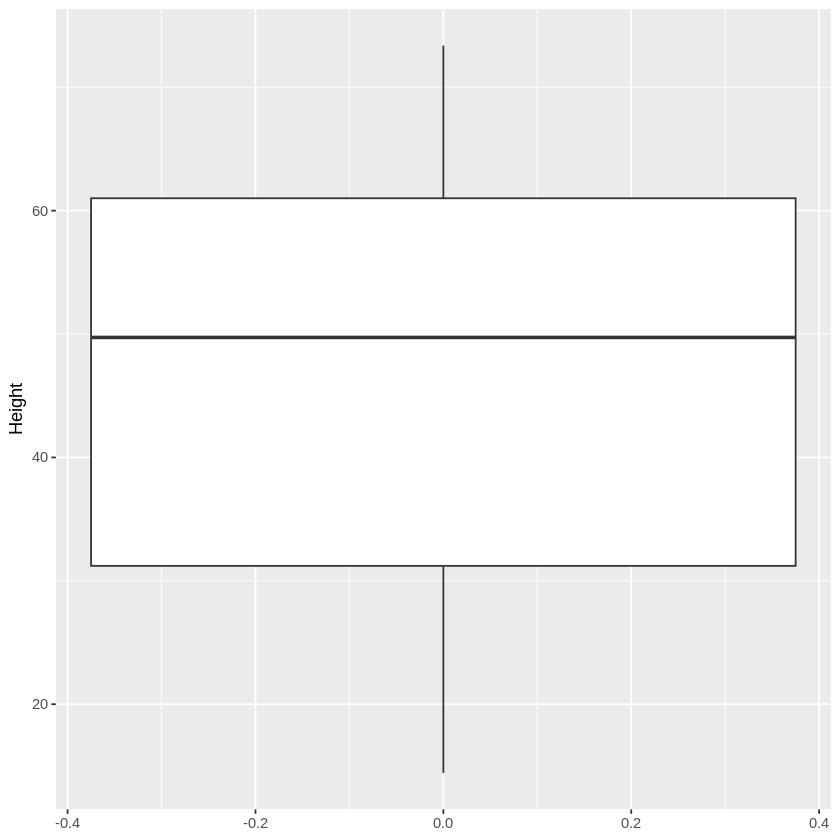

In [ ]:
# boxplotの描写
g <- ggplot(df, aes(y=Height))
g <- g + geom_boxplot()
g

また、`ggplot`関数でx軸、y軸両方のデータを指定すると、例えば花の色毎にボックスプロットを描くことも出来ます。

```
g <- ggplot(データフレーム名, aes(x=分類の基準となるデータの列名, y=可視化したい列名)) # データの指定
g <- g + geom_boxplot()                                                                # グラフの指定
```

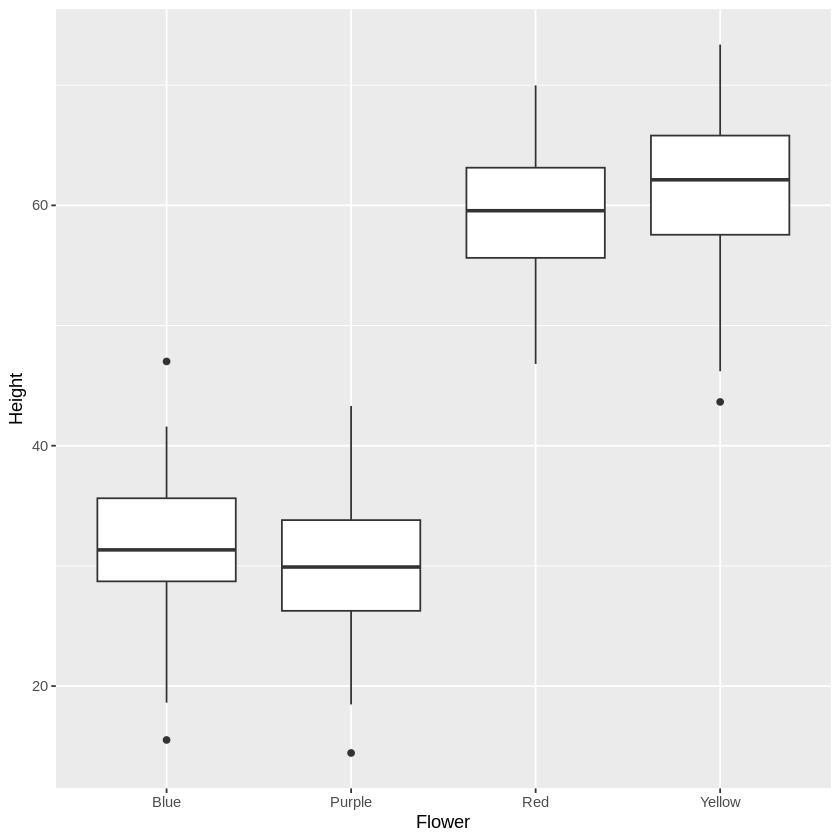

In [ ]:
# ボックスプロットを花の色ごとに分けて描写
g <- ggplot(df, aes(x=Flower, y=Height))
g <- g + geom_boxplot()
g

また、`geom_boxplot`で引数に`aes(fill=色分けの基準となるデータ列名)`や`aes(colour=色分けの基準となるデータ列名)`と指定することで、色付けも可能です。

```
g <- ggplot(データフレーム名, aes(x=分類の基準となるデータの列名, y=可視化したい列名)) # データの指定
g <- g + geom_boxplot(aes(fill=色分けの基準とする列名))                                # グラフの指定 & 色分けの設定
```

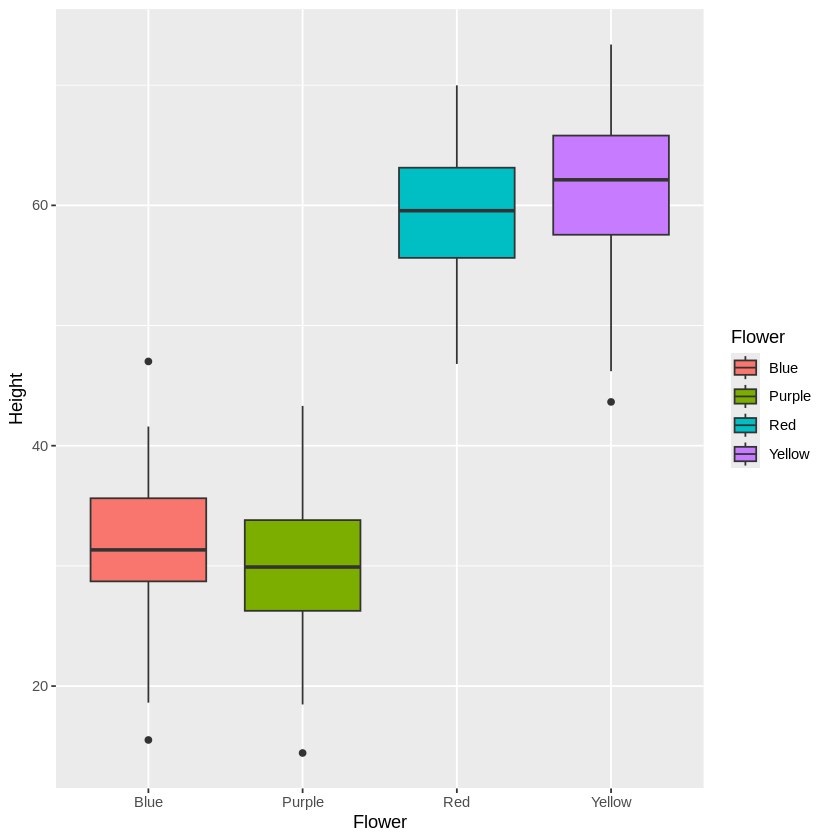

In [ ]:
# ボックスプロットの色分け
g <- ggplot(df, aes(x=Flower, y=Height))
g <- g + geom_boxplot(aes(fill=Flower))
g

ボックスプロットを描写する際に注意したいポイントとしては、ボックスプロットはあくまでも代表値(平均値)や４分位点等のデータを要約した値の情報しか得られません。

そのため、これらの要約した値の元データの点もプロットしておくとより良いボックスプロットとなります。

ジッタープロットと呼ばれるグラフになり、`ggplot2`では`geom_jitter`で追加可能です。

```
g <- ggplot(データフレーム名, aes(x=分類の基準となるデータの列名, y=可視化したい列名)) # データの指定
g <- g + geom_boxplot(aes(fill=色分けの基準とする列名))                                # グラフの指定 & 色分けの指定
g <- g + geom_jitter()                                                                 # ジッタープロットの追加
```

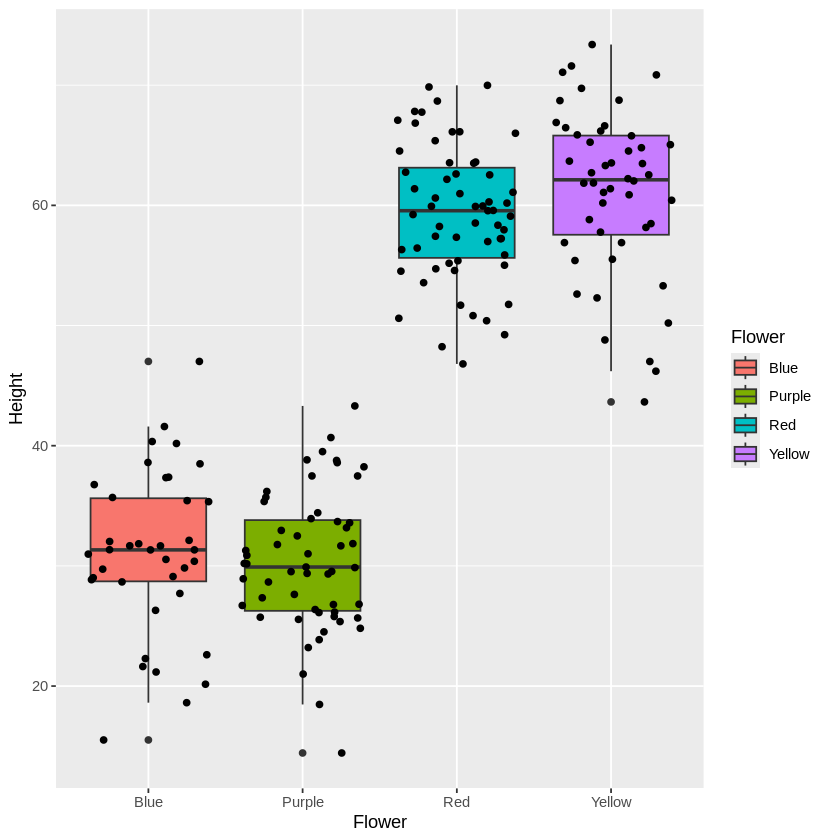

In [ ]:
# ジッタープロットの追加
g <- ggplot(df, aes(x=Flower, y=Height))
g <- g + geom_boxplot(aes(fill=Flower))
g <- g + geom_jitter()
g

これで、要約した値やばらつき具合だけでなく、実際のデータがどの様に分布していたのかも捉えることが出来るグラフになります。

ボックスプロットを描く際には、ジッタープロットで元データのプロットも忘れないようにしましょう。

### バイオリンプロット

先ほどのボックスプロットでは、データを要約した値を可視化していましたが、よりデータの分布を視覚的に強調したプロットがバイオリンプロットです。

バイオリンプロットのgeometric objectsは`geom_violin`になります。

データの指定などはボックスプロットと概ね同じです。

```
g <- ggplot(データフレーム名, aes(x=分類の基準となるデータの列名, y=可視化したい列名)) # データの指定
g <- g + geom_violin(aes(fill=色分けの基準とする列名))                                 # グラフの指定 & 色分けの指定
```

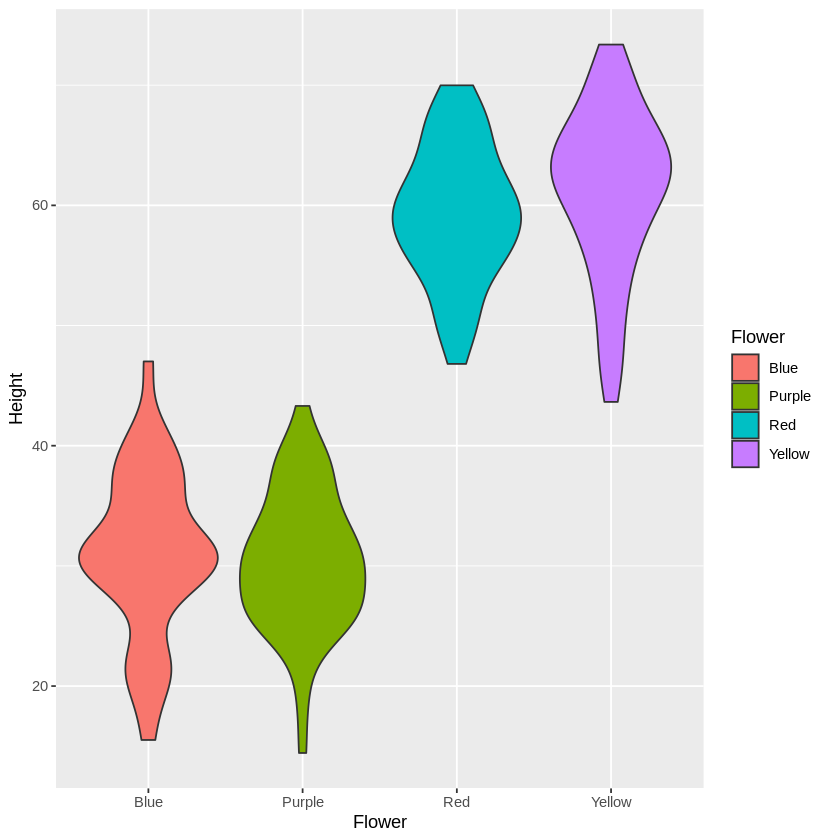

In [ ]:
# バイオリンプロットの描写
g <- ggplot(df, aes(x=Flower, y=Height))
g <- g + geom_violin(aes(fill=Flower))
g

バイオリンプロットだと、観察値の頻度が高い部分等の情報が可視化されています。

バイオリンプロットについてもボックスプロット同様に、元データをプロットしておきましょう。

```
g <- ggplot(データフレーム名, aes(x=分類の基準となるデータの列名, y=可視化したい列名)) # データの指定
g <- g + geom_violin(aes(fill=色分けの基準とする列名))                                 # グラフの指定 & 色分けの指定
g <- g + geom_jitter()                                                                 # ジッタープロットの追加
```

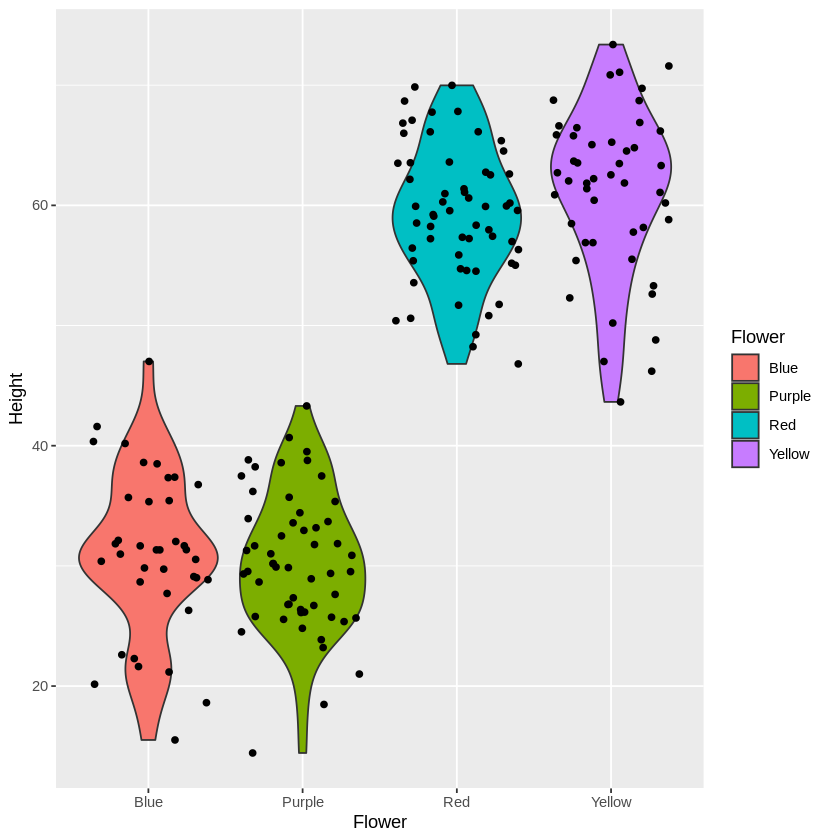

In [ ]:
# ジッタープロットの追加
g <- ggplot(df, aes(x=Flower, y=Height))
g <- g + geom_violin(aes(fill=Flower))
g <- g + geom_jitter()
g

代表的なグラフをいくつか紹介しましたが、`ggplot2`ではその他にもたくさんのグラフを描画することが可能です。

以下のurlにRで描くことが出来る様々なグラフの詳細が書かれているので、一度見ておくと良いと思います。

https://www.r-graph-gallery.com/index.html

また、今日扱った関数を含めて、`ggplot2`で使用可能になる関数の細かい使い方は公式ドキュメントに載っています。

公式ドキュメント: https://ggplot2.tidyverse.org/reference/

チートシート: https://rstudio.github.io/cheatsheets/html/data-visualization.html

細かい解説書も無料でアクセス可能なので、これらの資料を必要に応じて使用してみてください。

解説書: https://ggplot2-book.org/

## 課題

今回の課題は下の課題ページを実施し、Pandaの**テスト・クイズ**に記述してください。

[課題のノートブックへのリンク](https://colab.research.google.com/github/slt666666/biostatistics_text_wed/blob/main/source/_static/colab_notebook/chapter4_homework.ipynb)